# Test des fonctions dans utils.py pour le template Fitting par regression

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
print(os.getcwd())
sys.path.append(os.getcwd())
from utils import *

%matplotlib inline

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ


In [2]:
filtersPath = os.path.realpath('./LEPHARELSST/filt/lsst_baseline')
print(filtersPath)
filtersList = np.array( [ os.path.join(filtersPath, 'total_u.pb'),\
                           os.path.join(filtersPath, 'total_g.pb'),\
                           os.path.join(filtersPath, 'total_r.pb'),\
                           os.path.join(filtersPath, 'total_i.pb'),\
                           os.path.join(filtersPath, 'total_z.pb'),\
                           os.path.join(filtersPath, 'total_y.pb') ] )
print(filtersList.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARELSST/filt/lsst_baseline
(6,)


In [3]:
sedPath = os.path.realpath('./LEPHARE/sed/GAL/CWW_KINNEY')
print(sedPath)
sedList = np.array( [ os.path.join(sedPath, 'CWW_E_ext.sed'),\
                     os.path.join(sedPath, 'CWW_Sbc_ext.sed'),\
                     os.path.join(sedPath, 'CWW_Scd_ext.sed'),\
                     os.path.join(sedPath, 'CWW_Im_ext.sed'),\
                     os.path.join(sedPath, 'KIN_SB1_ext.sed'),\
                     os.path.join(sedPath, 'KIN_SB2_ext.sed'),\
                     os.path.join(sedPath, 'KIN_SB3_ext.sed'),\
                     os.path.join(sedPath, 'KIN_SB6_ext.sed') ] )
print(sedList.shape)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY
(8,)


In [4]:
numFilt, numSED = 0, 1
wlFilt, wlSED = np.loadtxt(filtersList[numFilt])[:, 0], np.loadtxt(sedList[numSED])[:, 0]
transmitFilt, intensSED = np.loadtxt(filtersList[numFilt])[:, 1], np.loadtxt(sedList[numSED])[:, 1]
print(wlFilt.shape, wlSED.shape, transmitFilt.shape, intensSED.shape)
print(wlFilt[0], wlSED[0], transmitFilt[0], intensSED[0])

(300,) (698,) (300,) (698,)
3000.0 10.0 0.0 0.0


Curiosity: luminous distance = 2881.2395967751268
[3.86325016e-10 8.61556515e-10 2.83985668e-09 4.59070177e-09
 5.75137316e-09 6.83219800e-09]
Curiosity: luminous distance = 10923.815731899875
[2.34711253e-11 4.93537018e-11 7.81447486e-11 1.24483324e-10
 2.37216650e-10 4.23812910e-10]
Curiosity: luminous distance = 25009.325151690442
[1.94743243e-12 6.58032060e-12 1.36214340e-11 2.56307428e-11
 2.76998194e-11 3.52662731e-11]
Curiosity: luminous distance = 39.204636530113895


Text(0.5, 0.98, '/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Sbc_ext.sed')

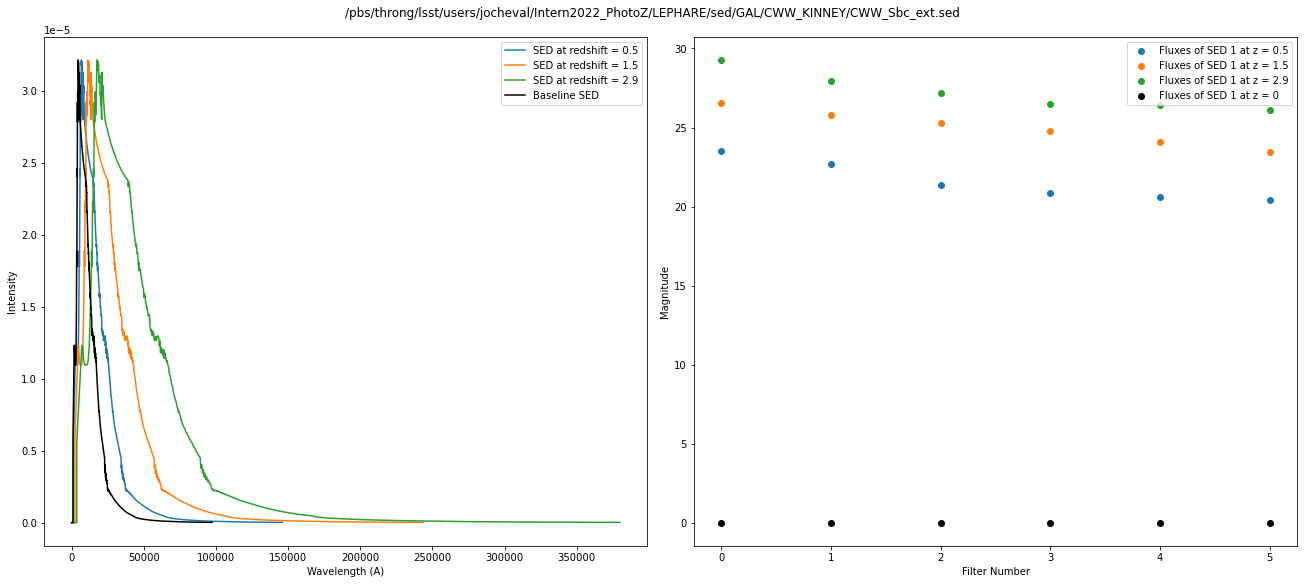

In [6]:
figZ, axZ = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True)
for z in [0.5, 1.5, 2.9]:
    wlZ, intZ, wl0, int0 = transposeSEDtoZ(wlSED, intensSED, z, zphot=0)
    
    approxDL = np.exp(30.5 * z**0.04 - 21.7)
    print('Curiosity: luminous distance = {}'.format(approxDL))
    fluxesZ = SEDtoFlux_obs(wlZ, intZ, filtersList)
    #fluxesZ *= (1+z)**2 / (4 * np.pi * approxDL**2)
    fluxesZ *= 1 / ( (4 * np.pi * approxDL**2) )
    print(fluxesZ)
    axZ[0].plot(wlZ, intZ, label='SED at redshift = {}'.format(z))
    axZ[1].scatter(np.arange(len(filtersList)), -2.5 * np.log10(fluxesZ), label='Fluxes of SED {} at z = {}'.format(numSED, z))
    #axZ[1].scatter(np.arange(len(filtersList)), fluxesZ, label='Fluxes of SED {} at z = {}'.format(numSED, z))

fluxes = SEDtoFlux_obs(wlSED, intensSED, filtersList)
approxDL = np.exp(30.5 * 0.01**0.04 - 21.7) ## arbitray redshift z=0.01
print('Curiosity: luminous distance = {}'.format(approxDL))
fluxes *= 1 / (4 * np.pi * (approxDL**2))
axZ[0].plot(wlSED, intensSED, color='k', label='Baseline SED')
#axZ[1].scatter(np.arange(len(filtersList)), -2.5 * np.log10(fluxes), color='k', label='Fluxes of SED {} at z = 0'.format(numSED))
axZ[1].scatter(np.arange(len(filtersList)), fluxes, color='k', label='Fluxes of SED {} at z = 0'.format(numSED))
axZ[0].set_xlabel('Wavelength (A)')
axZ[0].set_ylabel('Intensity')
axZ[0].legend()
axZ[1].set_xlabel('Filter Number')
axZ[1].set_ylabel('Magnitude')
axZ[1].legend()
figZ.suptitle(sedList[numSED])

Text(0.5, 0.98, '/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Sbc_ext.sed')

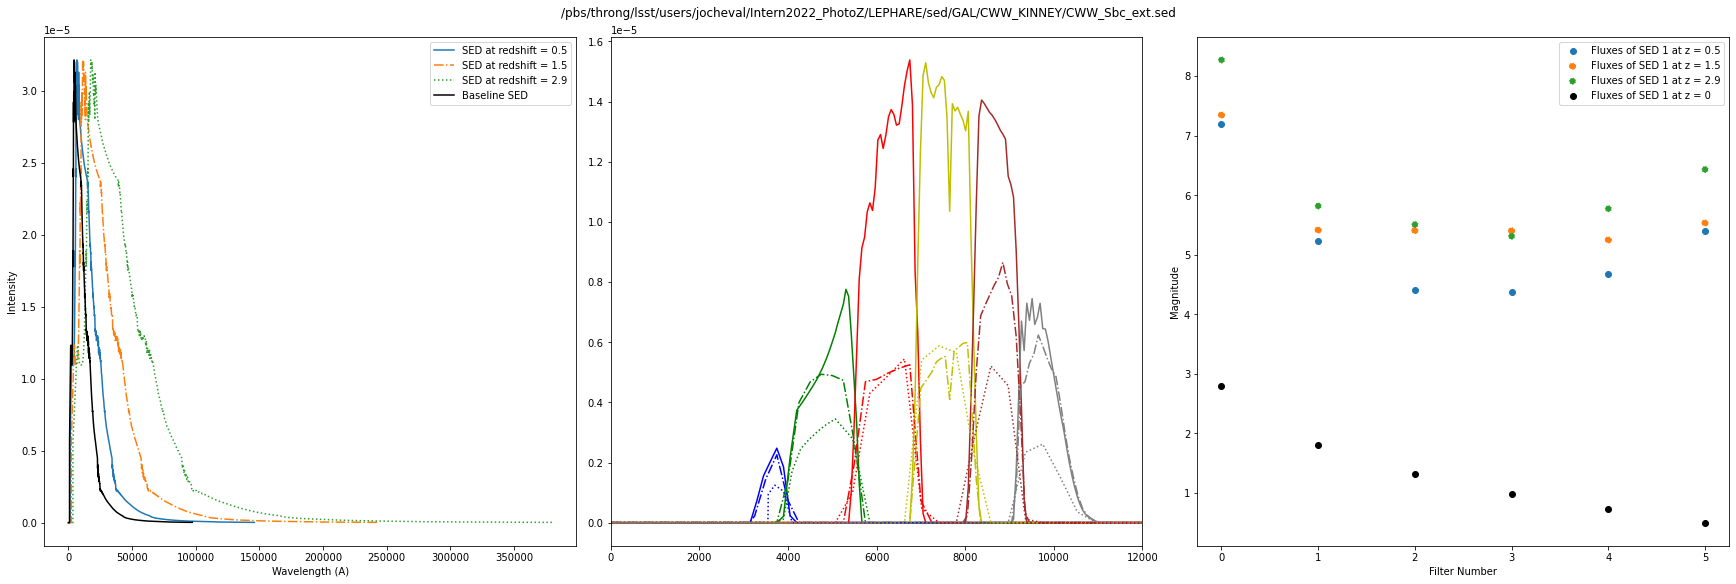

In [7]:
figZ, axZ = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)
for (z, ls) in zip([0.5, 1.5, 2.9], ['-', '-.', ':']):
    wlZ, intZ, wl0, int0 = transposeSEDtoZ(wlSED, intensSED, z, zphot=0)
    ## interpolate / extrapolate filters on the wavelength array
    interpFilt = np.zeros((len(wlZ), len(filtersList)))
    fluxesZ = np.zeros(len(filtersList))
    for (indFilt, c) in zip(np.arange(len(filtersList)), ['b', 'g', 'r', 'y', 'brown', 'grey']):
        ## interpolate / extrapolate filters on the wavelength array
        lambdaF = np.loadtxt(filtersList[indFilt])[:, 0]
        transmitF = np.loadtxt(filtersList[indFilt])[:, 1]
        interpFilt[:, indFilt] = np.interp(wlZ, lambdaF, transmitF, left=0.0, right=0.0)
        ## for each filter : multiply intensity * interpolated filter
        interpFilt[:, indFilt] *= intZ
        ## compute the flux for each filter by integration over wavelength
        fluxesZ[indFilt] = np.trapz(interpFilt[:, indFilt], wlZ)
        axZ[1].plot(wlZ, interpFilt[:, indFilt], ls=ls, color=c)
    axZ[1].set_xlim(0, 12000)
    axZ[0].plot(wlZ, intZ, label='SED at redshift = {}'.format(z), ls=ls)
    axZ[2].scatter(np.arange(len(filtersList)), -2.5 * np.log10(fluxesZ), label='Fluxes of SED {} at z = {}'.format(numSED, z), ls=ls)

fluxes = SEDtoFlux_obs(wlSED, intensSED, filtersList)
axZ[0].plot(wlSED, intensSED, color='k', label='Baseline SED')
axZ[2].scatter(np.arange(len(filtersList)), -2.5 * np.log10(fluxes), color='k', label='Fluxes of SED {} at z = 0'.format(numSED))
axZ[0].set_xlabel('Wavelength (A)')
axZ[0].set_ylabel('Intensity')
axZ[0].legend()
axZ[2].set_xlabel('Filter Number')
axZ[2].set_ylabel('Magnitude')
axZ[2].legend()
figZ.suptitle(sedList[numSED])

Text(0.5, 0.98, '/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Sbc_ext.sed')

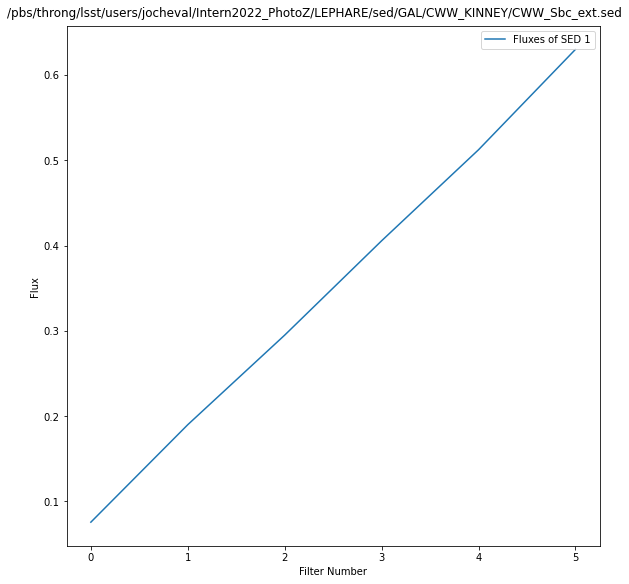

In [8]:
figF, axF = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)
fluxes = SEDtoFlux_obs(wlSED, intensSED, filtersList)
axF.plot(np.arange(0, len(filtersList)), fluxes, label='Fluxes of SED {}'.format(numSED))
axF.set_xlabel('Filter Number')
axF.set_ylabel('Flux')
axF.legend()
figF.suptitle(sedList[numSED])

In [9]:
redshifts = np.linspace(0, 3.01, num=50)
magOrFlux, allZcol, sedCol=buildTemplates(sedList, redshifts, filtersList)

In [10]:
delight_dir                = 'Delight'                        # directory where Delight is installed, relative should work.
desc_dir                   = 'desc-dc2'                       # subdir of Delight dir, for specific use. If none, use an empty string ""
delight_paramDir           = 'tmp'                            # subdir of descDir
delight_runFile            = 'run_delight_descdc2.py'         # usually in descDir
delight_paramFile          = 'parameters_DESC-DC2.cfg'        # usually in paramDir
test_filename              = 'PhotoZML/data/test_dc2_validation_9816.hdf5'   # relative path
train_filename             = 'PhotoZML/data/test_dc2_training_9816.hdf5' # relative path
#test_fileout_delight       = 'test_gal_fluxredshifts.txt'     # file name only - will be created in the appropriate directory, until this is automated
#train_fileout_delight      = 'train_gal_fluxredshifts.txt'    # file name only - will be created in the appropriate directory, until this is automated
lephare_dir                = 'LEPHARELSST'                    # relative path - should be the directory where LSST.para and runLePhareLSST.sh are located and run.
test_fileout_lephare       = 'test_DC2_VALID_CAT_IN.in'       # file name only - will be created in the appropriate directory, until this is automated
train_fileout_lephare      = 'train_DC2_VALID_CAT_IN.in'      # file name only - will be created in the appropriate directory, until this is automated
mag_filt                   = 31.8
snr_filt                   = 5.0
delight_absParamFile=os.path.realpath(os.path.normpath(os.path.join("./", delight_dir, desc_dir, delight_paramDir, delight_paramFile)))
execDir = os.path.realpath(os.getcwd())
os.chdir(os.path.realpath(os.path.normpath(os.path.join("./", delight_dir, desc_dir))))
sys.path.append(os.path.realpath(os.path.normpath(os.path.join('./', delight_dir))))
from delight.io import parseParamFile
params = parseParamFile(delight_absParamFile, verbose=False, catFilesNeeded=False)
os.chdir(execDir)
train_fileout_delight = params['training_catFile']
test_fileout_delight = params['target_catFile']
testFile_absPath=os.path.realpath(os.path.normpath(os.path.join("./", test_filename)))
trainFile_absPath=os.path.realpath(os.path.normpath(os.path.join("./", train_filename)))
delight_testFileoutAbs=os.path.realpath(os.path.normpath(os.path.join("./", delight_dir, desc_dir, test_fileout_delight)))
delight_trainFileoutAbs=os.path.realpath(os.path.normpath(os.path.join("./", delight_dir, desc_dir, train_fileout_delight)))
lephare_testFileoutAbs=os.path.realpath(os.path.normpath(os.path.join("./", lephare_dir, test_fileout_lephare)))
lephare_trainFileoutAbs=os.path.realpath(os.path.normpath(os.path.join("./", lephare_dir, train_fileout_lephare)))

In [11]:
test_data_mags, test_err_mags, test_data_colors, test_data_colmag, test_z, dummy1, dummy2 =\
    create_all_inputs(testFile_absPath,\
                      mag=mag_filt,\
                      snr=snr_filt,\
                      returnErrors=True,\
                      fileout_lephare=lephare_testFileoutAbs,\
                      fileout_delight=delight_testFileoutAbs)

U-Magnitude filter: (20449, 15) original, (1503, 15) removed, (18946, 15) left (20449 total for check).
SNR filter: (11394,) bad indexes, (7552, 15) left (18946 total for check).
(7552, 1)
Magnitudes, magnitude errors, colors, Colors+mag, Spectro-Z for ML ; input CAT file for LEPHARE ; input flux-redshift file for Delight :


In [12]:
train_data_mags, train_err_mags, train_data_colors, train_data_colmag, train_z, dummy3, dummy4 =\
    create_all_inputs(trainFile_absPath,\
                      mag=mag_filt,\
                      snr=snr_filt,\
                      returnErrors=True,\
                      fileout_lephare=lephare_trainFileoutAbs,\
                      fileout_delight=delight_trainFileoutAbs)

U-Magnitude filter: (10225, 15) original, (722, 15) removed, (9503, 15) left (10225 total for check).
SNR filter: (5748,) bad indexes, (3755, 15) left (9503 total for check).
(3755, 1)
Magnitudes, magnitude errors, colors, Colors+mag, Spectro-Z for ML ; input CAT file for LEPHARE ; input flux-redshift file for Delight :


In [21]:
nb_est=50
depth=30
# Random forest routine from scikit-learn:
from sklearn.ensemble import RandomForestRegressor
regrn = RandomForestRegressor(n_estimators = nb_est, max_depth = depth, max_features = 'auto')
regrn.fit(train_data_mags, train_z.ravel())
z_phot = regrn.predict(test_data_mags)

R2 score: 0.9175110216179535, Mean Absolute Error: 0.0773584243006599, Mean Squared Error: 0.015932570476639256


In [14]:
type(sedCol[0])
sedTupIds=np.arange(len(sedCol))

In [15]:
# Random forest routine from scikit-learn:
from sklearn.ensemble import RandomForestClassifier
clasf = RandomForestClassifier(n_estimators = nb_est, max_depth = depth, max_features = 'auto')
#clasf.fit(magOrFlux, sedCol)
clasf.fit(magOrFlux, sedTupIds)
SEDs_ML=clasf.predict(test_data_mags)
SEDs_ML=[sedCol[x] for x in SEDs_ML]
print(SEDs_ML[0:10])

[('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 0.42999999999999994), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.3071428571428571), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.18428571428571427), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 0.18428571428571427), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_E_ext.sed', 0.06142857142857142), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Sbc_ext.sed', 0.36857142857142855), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 0.4914285714285714), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 1.597142857142857), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHA

In [16]:
magOrFluxAndZ = np.column_stack((magOrFlux, allZcol))
test_data_mags_andZ = np.column_stack((test_data_mags, z_phot))
clasf.fit(magOrFluxAndZ, sedTupIds)
SEDs_ML_bis=clasf.predict(test_data_mags_andZ)
SEDs_ML_bis=[sedCol[x] for x in SEDs_ML_bis]
print(SEDs_ML_bis[0:10])

[('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 0.42999999999999994), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.3071428571428571), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.18428571428571427), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Im_ext.sed', 0.18428571428571427), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_E_ext.sed', 0.06142857142857142), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Sbc_ext.sed', 0.36857142857142855), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.2457142857142857), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARE/sed/GAL/CWW_KINNEY/CWW_Scd_ext.sed', 0.9828571428571428), ('/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LE

In [21]:
SEDs_ML_indices = np.array([], dtype=int)
for sed,z in SEDs_ML:
    for k in np.arange(len(sedList), dtype=int):
        if sed == sedList[k]:
            SEDs_ML_indices = np.append(SEDs_ML_indices, k)

SEDs_ML_bis_indices = np.array([], dtype=int)
for sed,z in SEDs_ML_bis:
    for k in np.arange(len(sedList), dtype=int):
        if sed == sedList[k]:
            SEDs_ML_bis_indices = np.append(SEDs_ML_bis_indices, k)

diffs_indices = np.argwhere(SEDs_ML_indices != SEDs_ML_bis_indices)

print(SEDs_ML_indices.shape, SEDs_ML_bis_indices.shape, len(diffs_indices), SEDs_ML_indices[0])

(7552,) (7552,) 659 0


In [22]:
#for index in diffs_indices.ravel():
#    print('Test gal {}, true z = {}, photo-z={}\nSED template without training on Z: {},\nSED template with training on Z: {}'.format(index, test_z.ravel()[index], z_phot_bis[index],\
#                                                                                                            sedList[SEDs_ML_indices[index]],\
#                                                                                                            sedList[SEDs_ML_bis_indices[index]]))

# Execution de LEPHARE avec Spec_ID

In [23]:
os.chdir(execDir)
os.chdir(os.path.realpath(os.path.normpath(os.path.join("./", lephare_dir))))
os.environ['LEPHAREDIR'] = os.path.realpath(os.path.normpath(os.path.join("..", 'LEPHARE')))
os.environ['LEPHAREWORK'] = os.getcwd()
os.environ['OMP_NUM_THREADS'] = '10'
os.environ['CAT_FILE_IN'] = lephare_testFileoutAbs
print(os.getcwd(), lephare_testFileoutAbs)

/pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARELSST /pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARELSST/test_DC2_VALID_CAT_IN.in


In [24]:
#subprocess.run('./runLePhareLSST.sh')
os.chdir(execDir)

In [25]:
lephareSpec_dir=os.path.realpath(os.path.join("./", lephare_dir, "spec_out"))
print(len(os.listdir(lephareSpec_dir)))

7553


In [26]:
print(os.listdir(lephareSpec_dir)[-1])

Id8063856132.spec


In [27]:
specList = os.listdir(lephareSpec_dir)
specList = [ x for x in specList if x.find(".spec") != -1 ]
print(len(specList))

7552


In [28]:
sedId_lePhare = np.array([], dtype=int)
for specFile in specList:
    rf = open(os.path.join(lephareSpec_dir, specFile), 'r')
    dummy = 'dummy'
    line=''
    while dummy != 'GAL-1':
        line = rf.readline()
        dummy = line.split()[0]
    line = line.split()
    modNum = line[2]
    sedId_lePhare = np.append(sedId_lePhare, int(modNum)-1)
    rf.close()
print(specList[0], sedId_lePhare[0])

Id8069519944.spec 4


In [29]:
indexId = np.array([], dtype=int)
galId = np.array(np.loadtxt(lephare_testFileoutAbs)[:, 0], dtype=int)
print(galId[0], specList[0])

8062500001 Id8069519944.spec


In [30]:
for gal in galId:
    for k in range(len(specList)):
        if specList[k].find(str(gal)) != -1:
            indexId = np.append(indexId, k)
print(len(indexId))

7552


In [31]:
sedId_lePhare_sorted = [ sedId_lePhare[ind] for ind in indexId ]
indexId[0]+3

90

In [32]:
sedId_lePhare_sorted = np.array(sedId_lePhare_sorted, dtype=int)
sedId_lePhare_sorted[0:9]

array([1, 2, 2, 2, 1, 1, 3, 2, 3])

In [33]:
diffs_indices_2 = np.argwhere(SEDs_ML_bis_indices != sedId_lePhare_sorted)

In [34]:
print(len(diffs_indices_2), len(SEDs_ML_bis_indices), len(sedId_lePhare_sorted))

7217 7552 7552


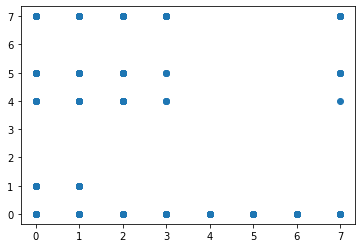

In [35]:
plt.scatter(sedId_lePhare_sorted, SEDs_ML_bis_indices)

In [36]:
## Load the results from LEPHARE
fileIn=os.path.realpath(os.path.normpath(os.path.join('./', lephare_dir, 'zphot_long.out')))

### Number of the filter start at 0
selFilt=0   # filter for the selection in mag
uFilt=0
gFilt=1
rFilt=2
iFilt=3
zFilt=4
yFilt=5

### Array in redshift and mag, isolate extreme values
range_z = [0,1,2,3,6]
z_min, z_max = np.amin(range_z), np.amax(range_z)
range_mag = [15.,22.5,23.5,25,28]
mag_min, mag_max = np.amin(range_mag), np.amax(range_mag)

### READ THE INPUT FILE
### Read the first argument with the name of the photo-z output catalogue
catIn=open(fileIn,'r')
print("Name of the photo-z catalogue : ", fileIn)

### Loop over the filters
nbFilt=6
magst=""
idmagst=""
### create the string to read the mag
for i in range(nbFilt) :
    magst=magst+",mag"+str(i)
    idmagst=idmagst+","+str(i+20)
### create the string to read the error mag
for i in range(nbFilt) :
    magst=magst+",emag"+str(i)
    idmagst=idmagst+","+str(i+20+nbFilt)
### create the string to read the kcor
for i in range(nbFilt) :
    magst=magst+",kcor"+str(i)
    idmagst=idmagst+","+str(i+20+2*nbFilt)
### create the string to read the absolute mag
for i in range(nbFilt) :
    magst=magst+",absmag"+str(i)
    idmagst=idmagst+","+str(i+20+3*nbFilt)
### create the string to read the uncertainties on absolute mag
for i in range(nbFilt) :
    magst=magst+",eabsmag"+str(i)
    idmagst=idmagst+","+str(i+20+4*nbFilt)
### create the string for absolute mag filters
for i in range(nbFilt) :
    magst=magst+",mabsfilt"+str(i)
    idmagst=idmagst+","+str(i+20+5*nbFilt)

lastIdMagst=int(idmagst.split(',')[-1])
lastString=",{},{},{},{}".format(lastIdMagst+1, lastIdMagst+2, lastIdMagst+3, lastIdMagst+4)

### Extract from the ascii file
commandst = "Id,zp,zl68,zu68,zml,zmll68,zmlu68,chi,mod,law,ebv,zp2,chi2,mod2,ebv2,zq,chiq,modq,mods,chis"+magst+",scale,nbFilt,context,zs= np.loadtxt(catIn, dtype='float', usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19"+idmagst+lastString+"), unpack=True )"

### transform the string into a command
print(commandst)
exec(commandst)

### CONDITION FOR SELECTION
### Mag use to select the sample
mag=eval("mag"+str(selFilt))
### General condition to select the galaxies in the expected z/mag range
cond = (zp>z_min) & (zp<z_max) & (mag>mag_min) & (mag<mag_max) 
### condition to select stars
condstar = (chis<chi)
### condition to select galaxies
condgal =  (~condstar)
### condition to select spectroscopic redshifts
condspec = (zs>0) & (zs<9)

### Load the PDZ from LEPHARE
pdzOut = os.path.realpath(os.path.normpath(os.path.join("./", lephare_dir, 'pdzOut.pdz')))
pdzRange = np.arange(0.01, 3.02, 0.01)
pdzRange = np.concatenate((np.array([0.0]), pdzRange, np.array([3.01])))
pdzPhare = np.loadtxt(pdzOut)

Name of the photo-z catalogue :  /pbs/throng/lsst/users/jocheval/Intern2022_PhotoZ/LEPHARELSST/zphot_long.out
Id,zp,zl68,zu68,zml,zmll68,zmlu68,chi,mod,law,ebv,zp2,chi2,mod2,ebv2,zq,chiq,modq,mods,chis,mag0,mag1,mag2,mag3,mag4,mag5,emag0,emag1,emag2,emag3,emag4,emag5,kcor0,kcor1,kcor2,kcor3,kcor4,kcor5,absmag0,absmag1,absmag2,absmag3,absmag4,absmag5,eabsmag0,eabsmag1,eabsmag2,eabsmag3,eabsmag4,eabsmag5,mabsfilt0,mabsfilt1,mabsfilt2,mabsfilt3,mabsfilt4,mabsfilt5,scale,nbFilt,context,zs= np.loadtxt(catIn, dtype='float', usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59), unpack=True )


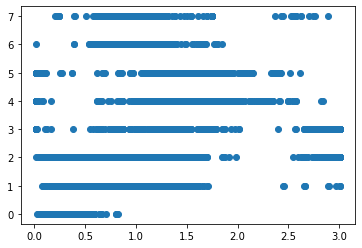

In [37]:
plt.scatter(zp, sedId_lePhare_sorted)

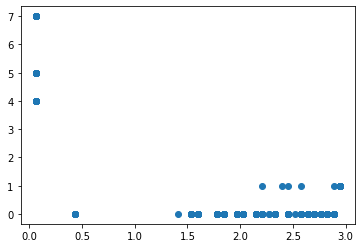

In [38]:
z_ML_bis=[z for sed,z in SEDs_ML_bis]
plt.scatter(z_ML_bis, SEDs_ML_bis_indices)

7552 7552 2.9627898371909622


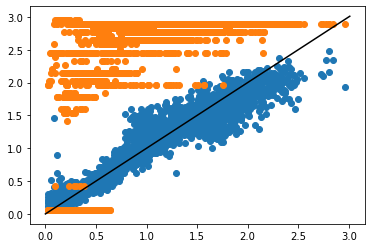

In [40]:
print(len(test_z), len(z_ML_bis), np.max(test_z))
plt.scatter(test_z, z_phot)
plt.scatter(test_z, z_ML_bis)
plt.plot([0.0, 3.01], [0.0, 3.01], color='k')